## En este notebook vamos a analizar el trafico en la pagina y todo lo que respecta con ello. Trafico por dias, por semanas, por mes, por trimestre y en lo que va del año.

In [1]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [3]:
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')

## Analisis de trafico en la pagina por hora en toda la semana

In [4]:
dia_vs_hora = pd.DataFrame({'dia': events['timestamp'].dt.weekday_name,'hora':events['timestamp'].dt.hour})
dia_vs_hora.head()

,dia,hora
0,Thursday,23
1,Thursday,23
2,Thursday,23
3,Thursday,23
4,Tuesday,13


In [5]:
dias_vs_horas = pd.DataFrame(dia_vs_hora.groupby('dia')['hora'].value_counts().sort_index())
dias_vs_horas = dias_vs_horas.rename(columns = {'hora':'visitas'}) 
dias_vs_horas = dias_vs_horas.reset_index()
dias_vs_horas.head()

,dia,hora,visitas
0,Friday,0,10357
1,Friday,1,8485
2,Friday,2,7491
3,Friday,3,5387
4,Friday,4,2982


In [6]:
dias_vs_horas = dias_vs_horas.pivot('hora','dia','visitas')
dias_vs_horas = dias_vs_horas[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
dias_vs_horas.head()

dia,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hora,,,,,,,
0,6858,11122,10422,10155,10357,9211,6253
1,6578,10618,9727,9680,8485,7600,6290
2,5068,8604,7747,7807,7491,6535,5284
3,3226,5380,5316,5599,5387,4560,3650
4,2002,3453,2529,2938,2982,2580,2354


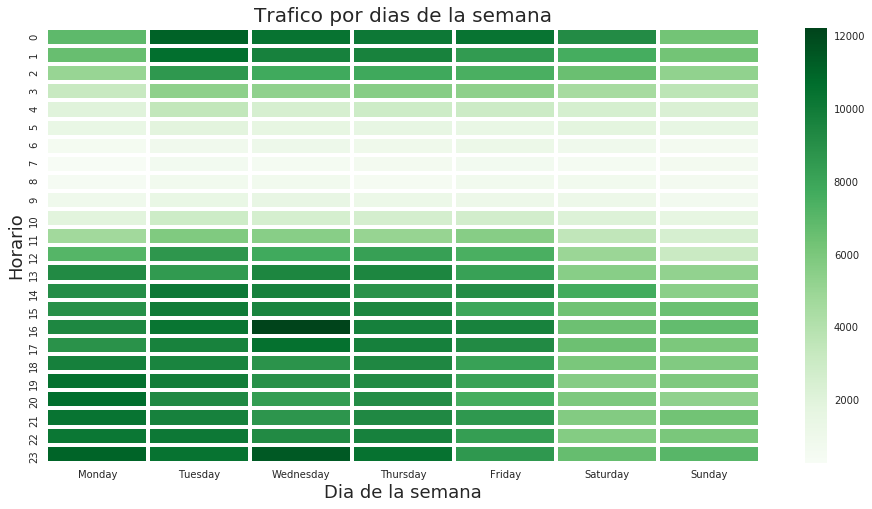

In [7]:
plt.figure(figsize = (16,8))
ax = sns.heatmap(dias_vs_horas,linewidth = 3, cmap = 'Greens')
ax.set_title('Trafico por dias de la semana',Fontsize = 20)
ax.set_xlabel('Dia de la semana',Fontsize = 18)
ax.set_ylabel('Horario',fontsize = 18);

Se puede observar que el mayor trafico ocurre de Lunes a Viernes apartir de las 12pm hasta la 1am del dia siguiente. En caso de tener que hacer alguna migracion o matenimiento de la pagina seria conveniente hacerlo entre las 3am-9am.

In [8]:
dias = pd.DataFrame({'nombre_dia': events['timestamp'].dt.weekday_name,'fecha':events['timestamp'].dt.date})
dias.head()

,fecha,nombre_dia
0,2018-05-31,Thursday
1,2018-05-31,Thursday
2,2018-05-31,Thursday
3,2018-05-31,Thursday
4,2018-05-29,Tuesday


In [9]:
cantidad_evento_dia = dias.groupby('fecha')['nombre_dia'].value_counts().to_frame()\
    .rename(columns = {'nombre_dia':'number'}).reset_index()
cantidad_evento_dia.head()

,fecha,nombre_dia,number
0,2018-01-01,Monday,29
1,2018-01-02,Tuesday,278
2,2018-01-03,Wednesday,454
3,2018-01-04,Thursday,476
4,2018-01-05,Friday,789


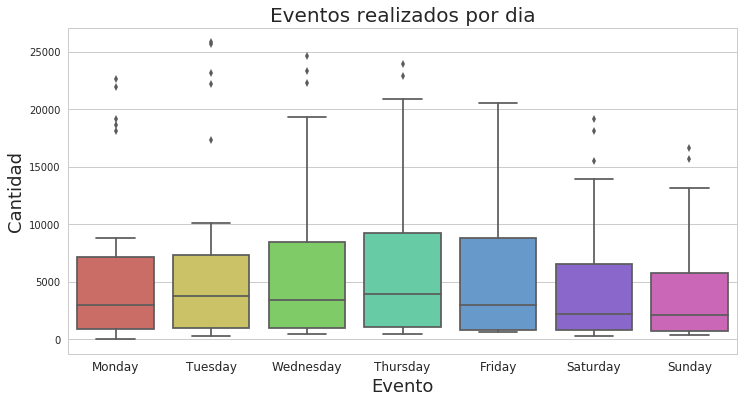

In [10]:
plt.figure(figsize = (12,6))
g = sns.boxplot(x="nombre_dia", y="number", 
                     data=cantidad_evento_dia, palette="hls")
g.set_title("Eventos realizados por dia", fontsize=20)
g.set_xlabel("Evento", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 12);

#### Realizamos ahora una comparacion del trafico por trimestre

In [11]:
def asignar_trimestre(mes):
    """Dado un mes devuelve su trimestre que puede ser 1 o 2"""
    if mes in [1,2,3]:
        return 1
    return 2

trimestres = pd.DataFrame({'trimestre': events['timestamp'].dt.month.map(lambda x: asignar_trimestre(x)),'mes':events['timestamp'].dt.month})
trimestres.head()

,mes,trimestre
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


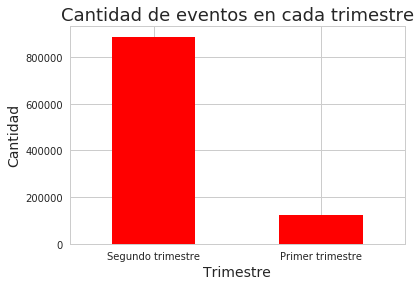

In [12]:
g = trimestres['trimestre'].value_counts().plot(kind = 'bar', color='red')
g.set_title('Cantidad de eventos en cada trimestre',fontsize = 18)
g.set_ylabel('Cantidad',fontsize = 14)
g.set_xlabel('Trimestre',fontsize = 14)
g.set_xticklabels(['Segundo trimestre','Primer trimestre'],rotation = 0, fontsize = 10);

In [13]:
primer_trimestre = trimestres[trimestres['trimestre'] == 1].groupby('trimestre')['mes'].value_counts().sort_index().values
segundo_trimestre = trimestres[trimestres['trimestre'] == 2].groupby('trimestre')['mes'].value_counts().sort_index().values
trimestres = pd.DataFrame({'Primer trimestre':primer_trimestre,'Segundo trimestre': segundo_trimestre})
trimestres

,Primer trimestre,Segundo trimestre
0,19270,130008
1,27886,474949
2,77293,281882


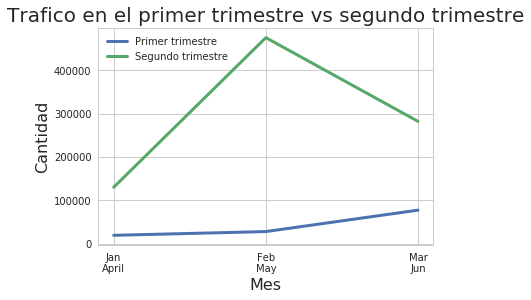

In [14]:
g = trimestres.plot(linewidth=3)
g.set_title('Trafico en el primer trimestre vs segundo trimestre',fontsize = 20)
g.set_xlabel('Mes',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);
plt.xticks([0, 1,2], ["Jan\nApril", "Feb\nMay", "Mar\nJun"]);

#### Ahora veremos el trafico que tuvo la pagina durante el 2018

In [26]:
año = events['timestamp'].dt.month.value_counts().sort_index()
año

1     19270
2     27886
3     77293
4    130008
5    474949
6    281882
Name: timestamp, dtype: int64

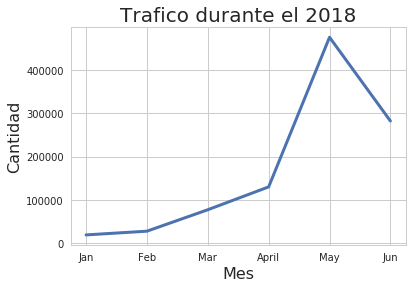

In [27]:
g = año.plot(linewidth=3)
g.set_title('Trafico durante el 2018',fontsize = 20)
g.set_xlabel('Mes',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);
plt.xticks([1, 2, 3, 4, 5, 6], ["Jan", "Feb", "Mar", "April", "May", "Jun"]);

In [28]:
#podriamos mensionar que brasil esta pasando por una crisis ?